In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Step 2: Load the dataset
df1 = pd.read_csv('/content/drive/MyDrive/ML/dataset population.csv')


In [3]:

# Load the dataset
df1 = pd.read_csv('/content/drive/MyDrive/ML/dataset population.csv')


In [4]:

# Print columns to check their names
print(df1.columns)

Index(['State', '2011_Persons', '2011_Male', '2011_Female', '2012_Persons',
       '2012_Male', '2012_Female', '2013_Persons', '2013_Male', '2013_Female',
       '2016_Persons', '2016_Male', '2016_Female', '2021_Persons', '2021_Male',
       '2021_Female', '2026_Persons', '2026_Male', '2026_ Female'],
      dtype='object')


In [7]:
# Prepare years and target years for prediction
# We already have data for 2011, 2012, 2013, 2016, 2021, 2026
historical_years = np.array([2011, 2012, 2013, 2016, 2021, 2026]).reshape(-1, 1)
predicted_years = np.array([2014, 2015, 2017, 2018, 2019, 2020, 2022, 2023, 2024, 2025, 2027]).reshape(-1, 1)

In [8]:
# Prepare a dictionary to store predictions
predicted_data = {
    'State': [],
    'Year': [],
    'Persons': [],
    'Males': [],
    'Females': []
}


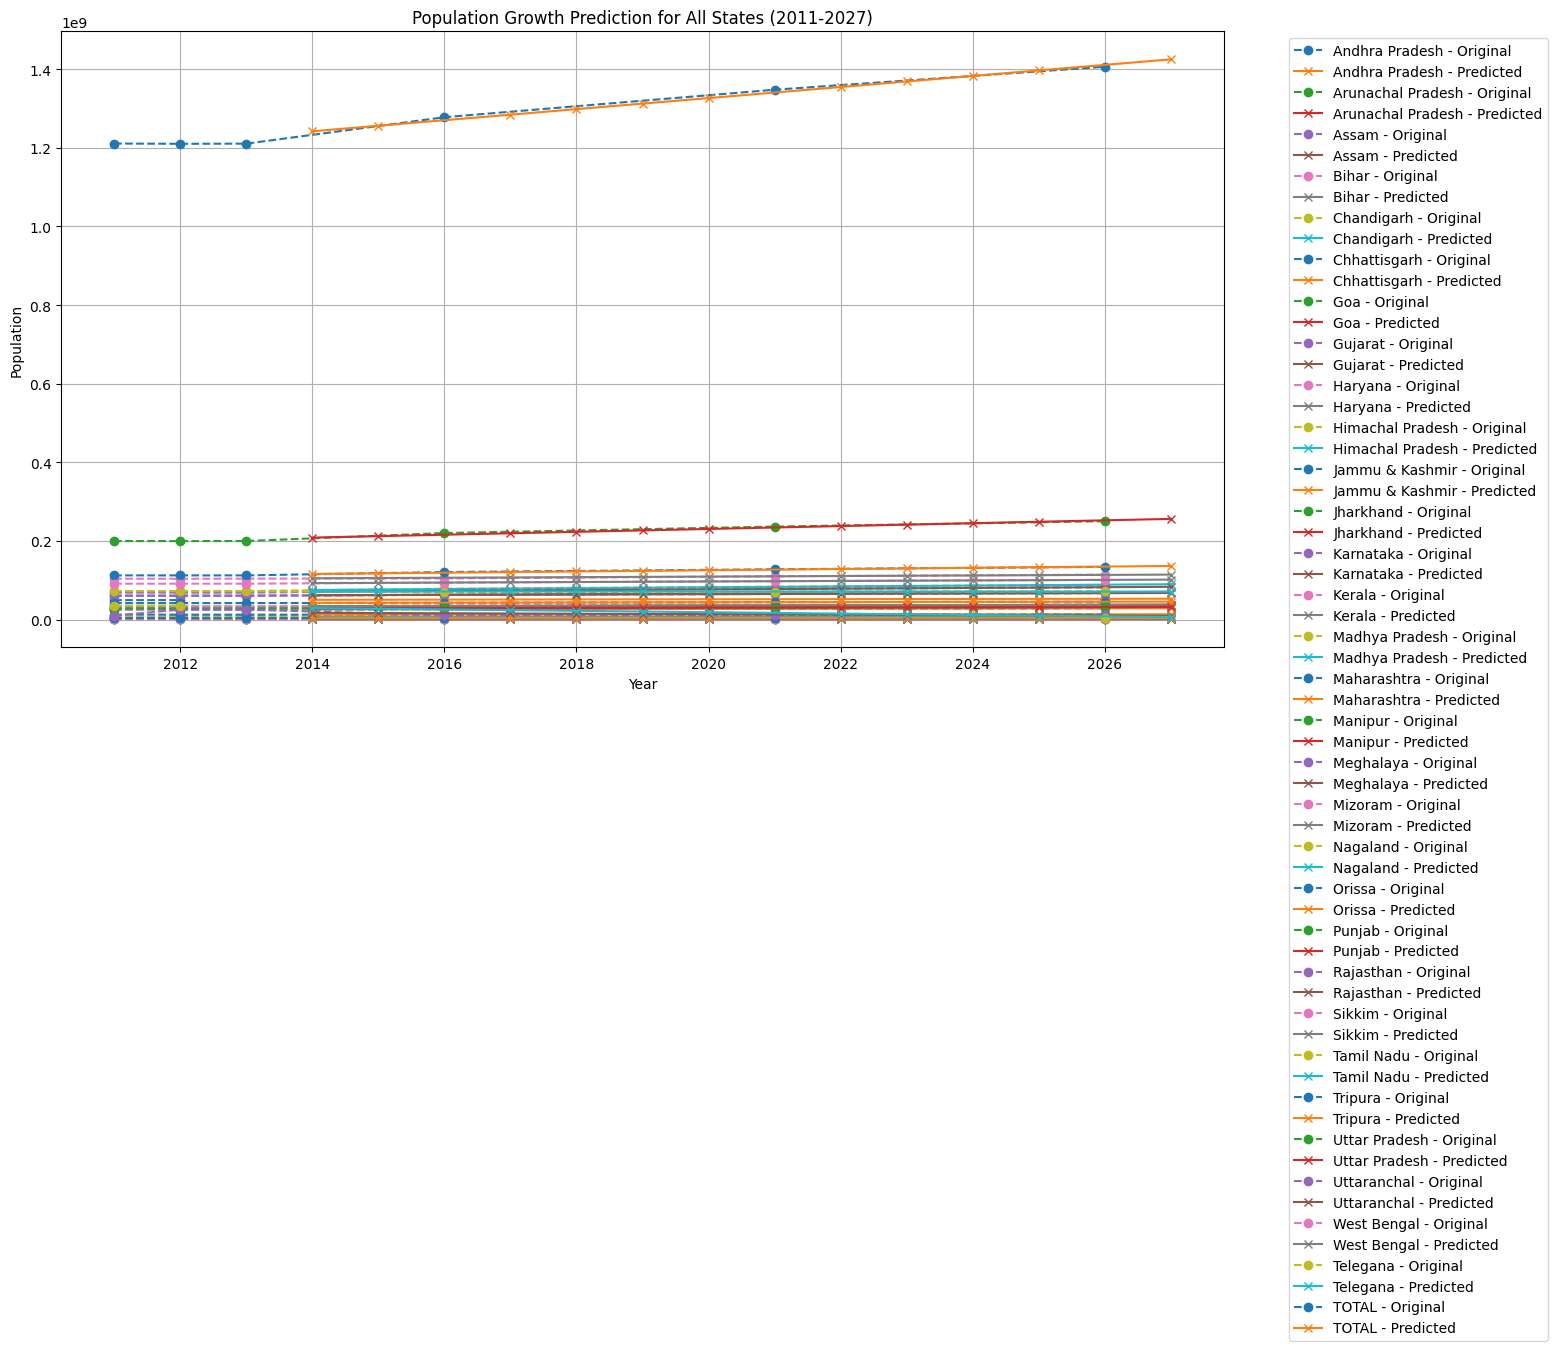

In [30]:
# Iterate over each state to perform linear regression
for index, row in df1.iterrows():
    state_name = row['State']

    # Prepare data for regression with the correct column names
    population_persons = np.array([
        row['2011_Persons'], row['2012_Persons'], row['2013_Persons'],
        row['2016_Persons'], row['2021_Persons'], row['2026_Persons']
    ]).reshape(-1, 1)

    population_males = np.array([
        row['2011_Male'], row['2012_Male'], row['2013_Male'],
        row['2016_Male'], row['2021_Male'], row['2026_Male']
    ]).reshape(-1, 1)

    population_females = np.array([
        row['2011_Female'], row['2012_Female'], row['2013_Female'],
        row['2016_Female'], row['2021_Female'], row['2026_ Female']
    ]).reshape(-1, 1)

    # Check for NaN values and fill them with the mean
    if np.any(np.isnan(population_persons)):
        avg_population_persons = np.nanmean(population_persons)  # Compute mean, ignoring NaN
        population_persons = np.where(np.isnan(population_persons), avg_population_persons, population_persons)

    if np.any(np.isnan(population_males)):
        avg_population_males = np.nanmean(population_males)
        population_males = np.where(np.isnan(population_males), avg_population_males, population_males)

    if np.any(np.isnan(population_females)):
        avg_population_females = np.nanmean(population_females)
        population_females = np.where(np.isnan(population_females), avg_population_females, population_females)

    # Linear Regression for Persons
    model_persons = LinearRegression().fit(historical_years, population_persons)
    persons_forecast = model_persons.predict(predicted_years)

    # Linear Regression for Males
    model_males = LinearRegression().fit(historical_years, population_males)
    males_forecast = model_males.predict(predicted_years)

    # Linear Regression for Females
    model_females = LinearRegression().fit(historical_years, population_females)
    females_forecast = model_females.predict(predicted_years)

    # Store the predictions
    for i, future_year in enumerate(predicted_years.flatten()):
        predicted_data['State'].append(state_name)
        predicted_data['Year'].append(future_year)
        predicted_data['Persons'].append(persons_forecast[i][0])
        predicted_data['Males'].append(males_forecast[i][0])
        predicted_data['Females'].append(females_forecast[i][0])

# Convert the predictions to a DataFrame
predicted_df = pd.DataFrame(predicted_data)

# Convert to integer to clean up output
predicted_df['Persons'] = predicted_df['Persons'].astype(int)
predicted_df['Males'] = predicted_df['Males'].astype(int)
predicted_df['Females'] = predicted_df['Females'].astype(int)

# Save predicted data to Excel
predicted_df.to_excel('predicted_dataset.xlsx', index=False)

# Plotting
plt.figure(figsize=(15, 8))

for state in df1['State'].unique():
    # Filter data for the current state
    original_state_data = df1[df1['State'] == state]
    predicted_state_data = predicted_df[predicted_df['State'] == state]

    # Prepare data for plotting
    years_existing = np.array([2011, 2012, 2013, 2016, 2021, 2026])
    persons_existing = original_state_data[['2011_Persons', '2012_Persons', '2013_Persons', '2016_Persons', '2021_Persons', '2026_Persons']].values.flatten()
    forecasted_years = predicted_state_data['Year'].values
    persons_forecasted = predicted_state_data['Persons'].values

    # Plot the original data
    plt.plot(years_existing, persons_existing, marker='o', linestyle='--', label=f"{state} - Original")

    # Plot the predicted data
    plt.plot(forecasted_years, persons_forecasted, marker='x', linestyle='-', label=f"{state} - Predicted")

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth Prediction for All States (2011-2027)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

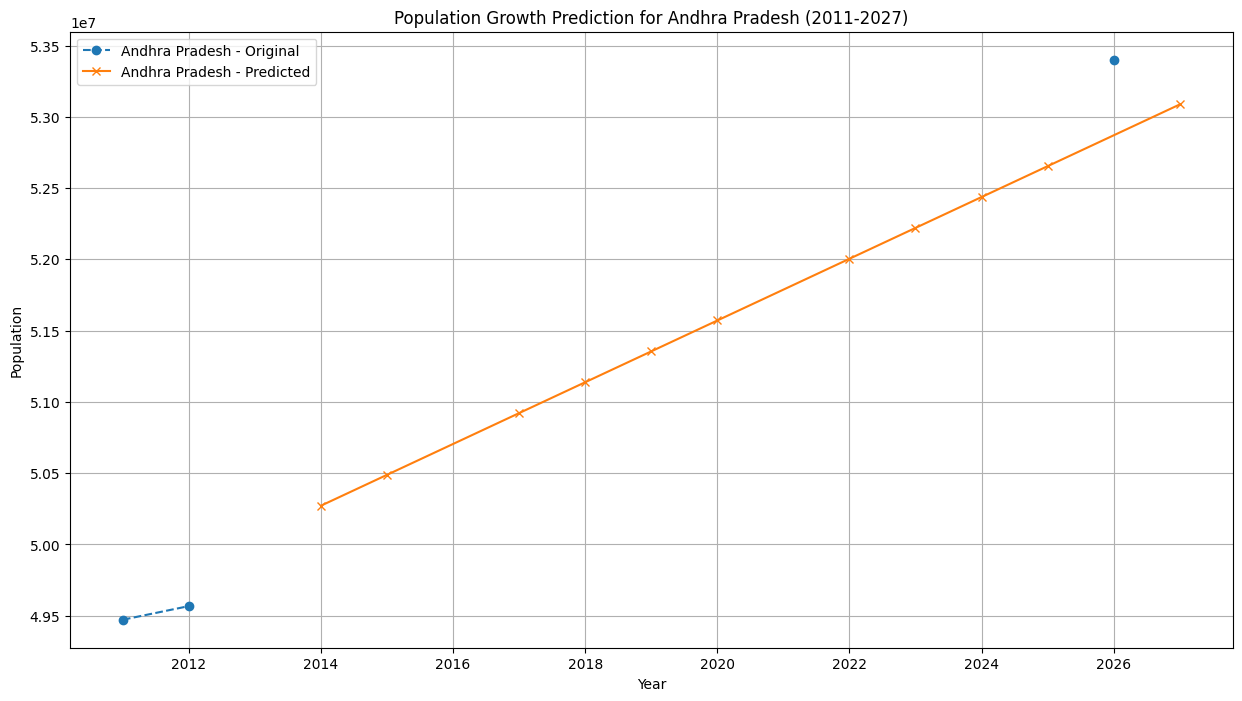

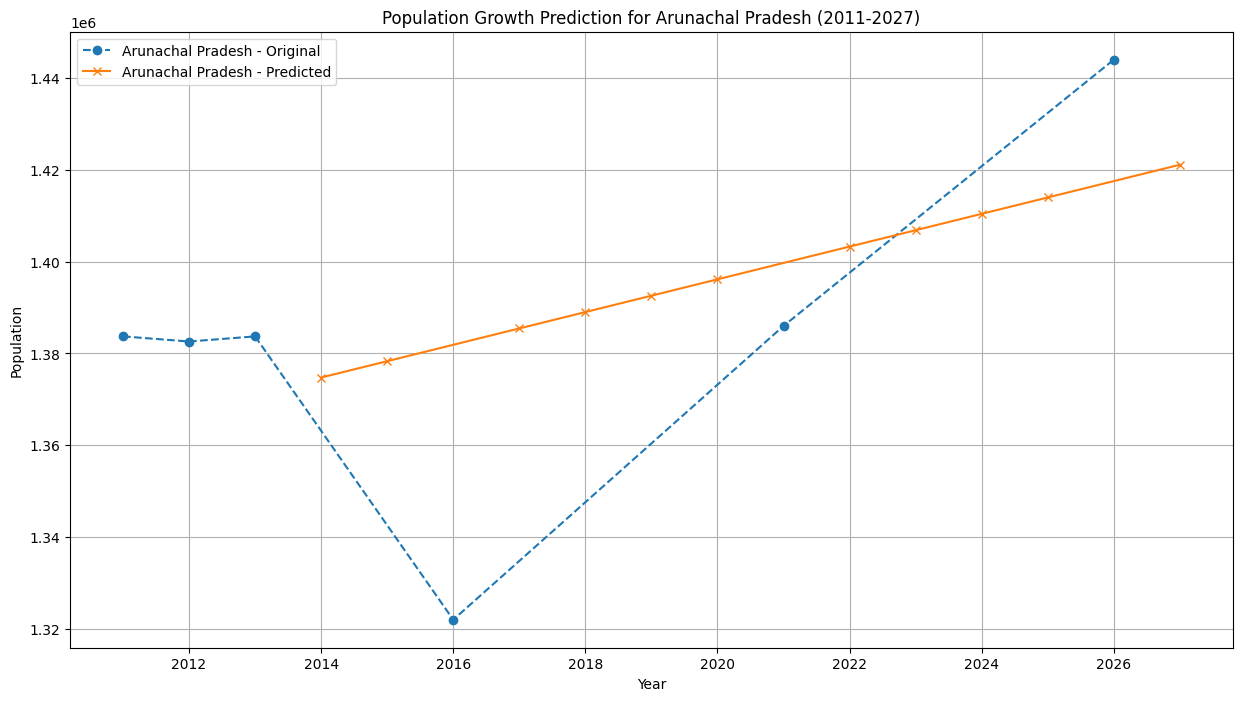

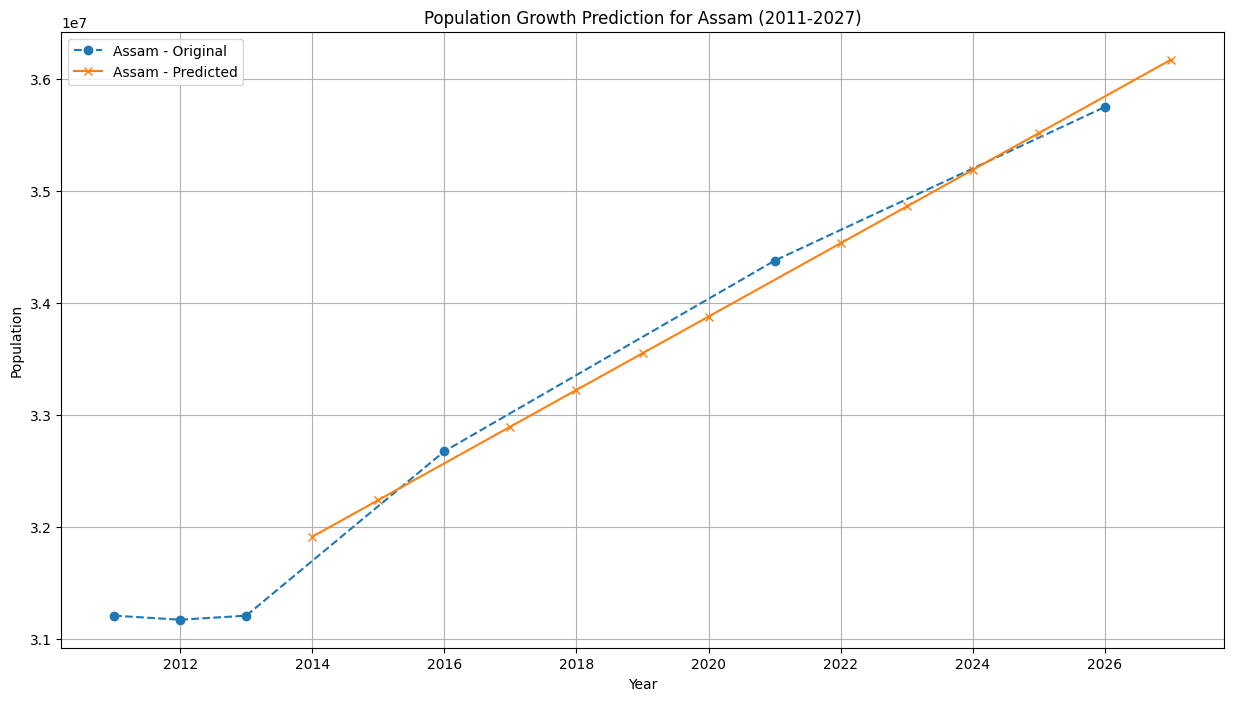

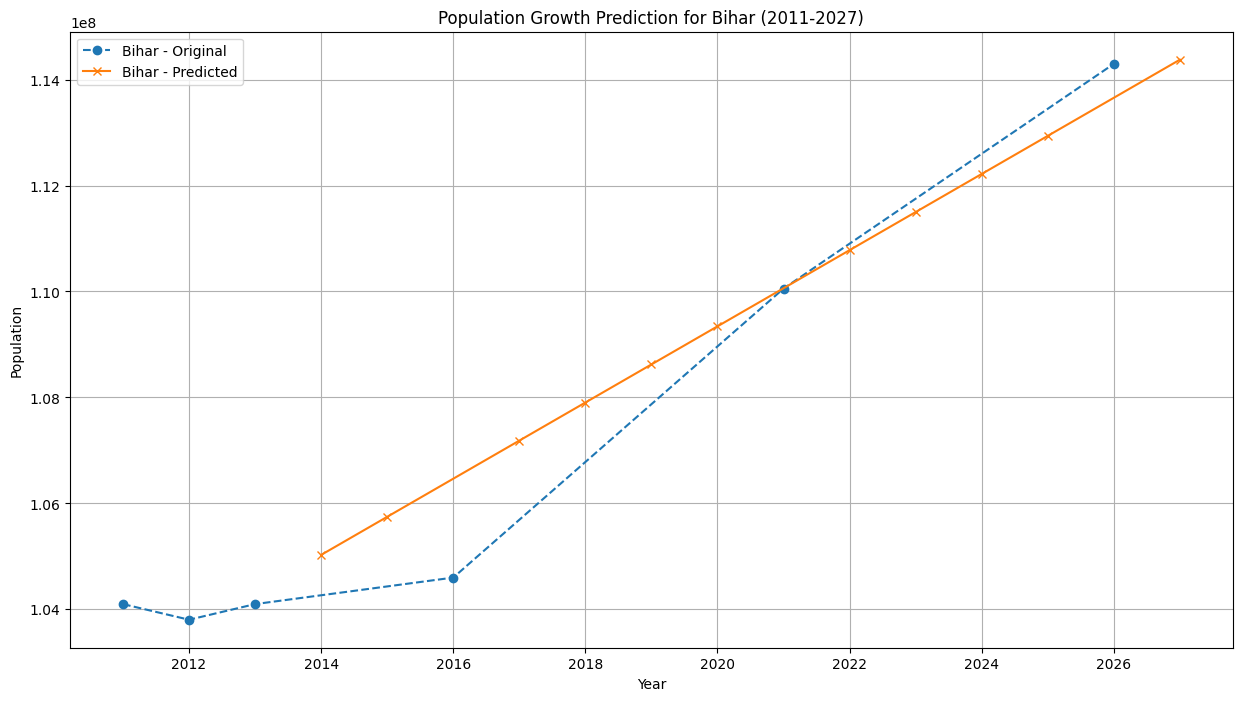

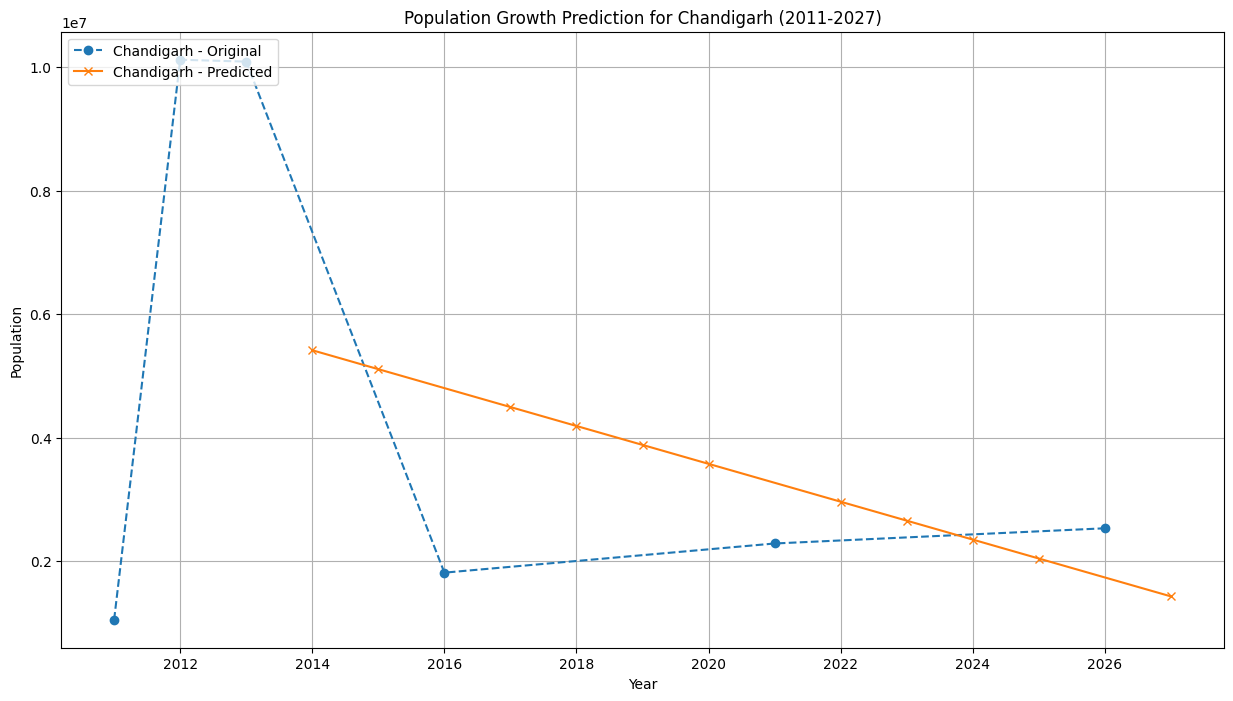

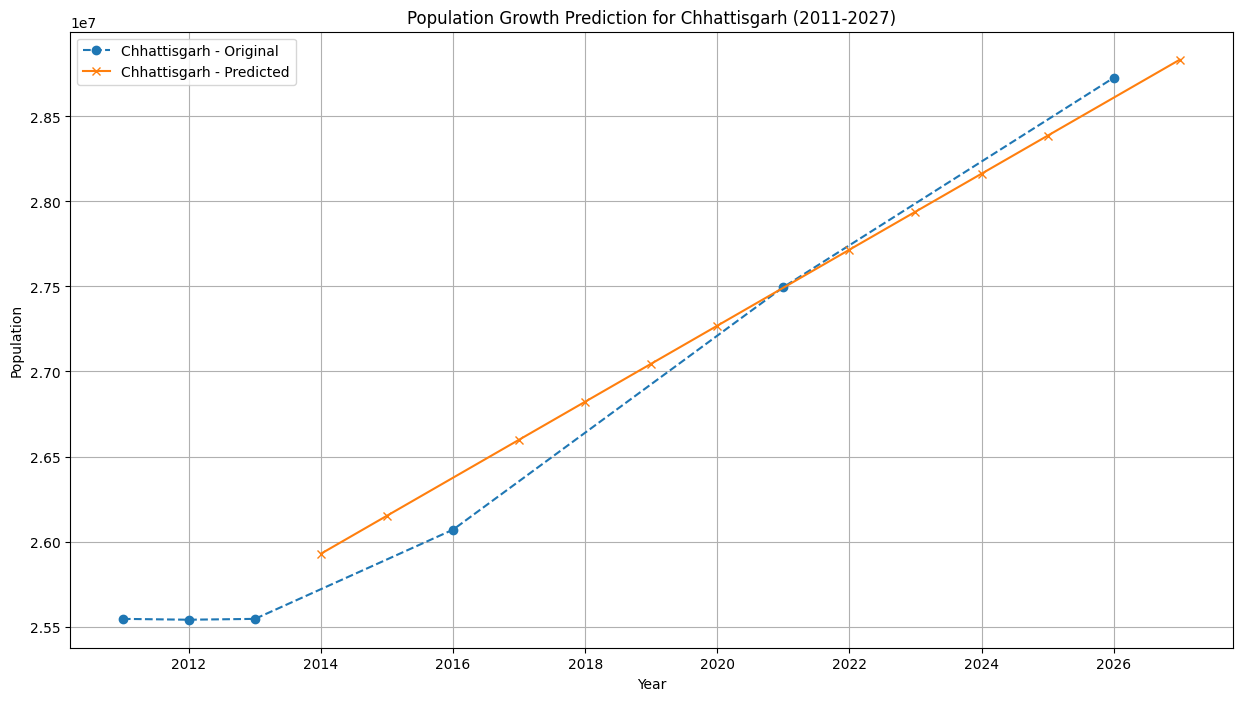

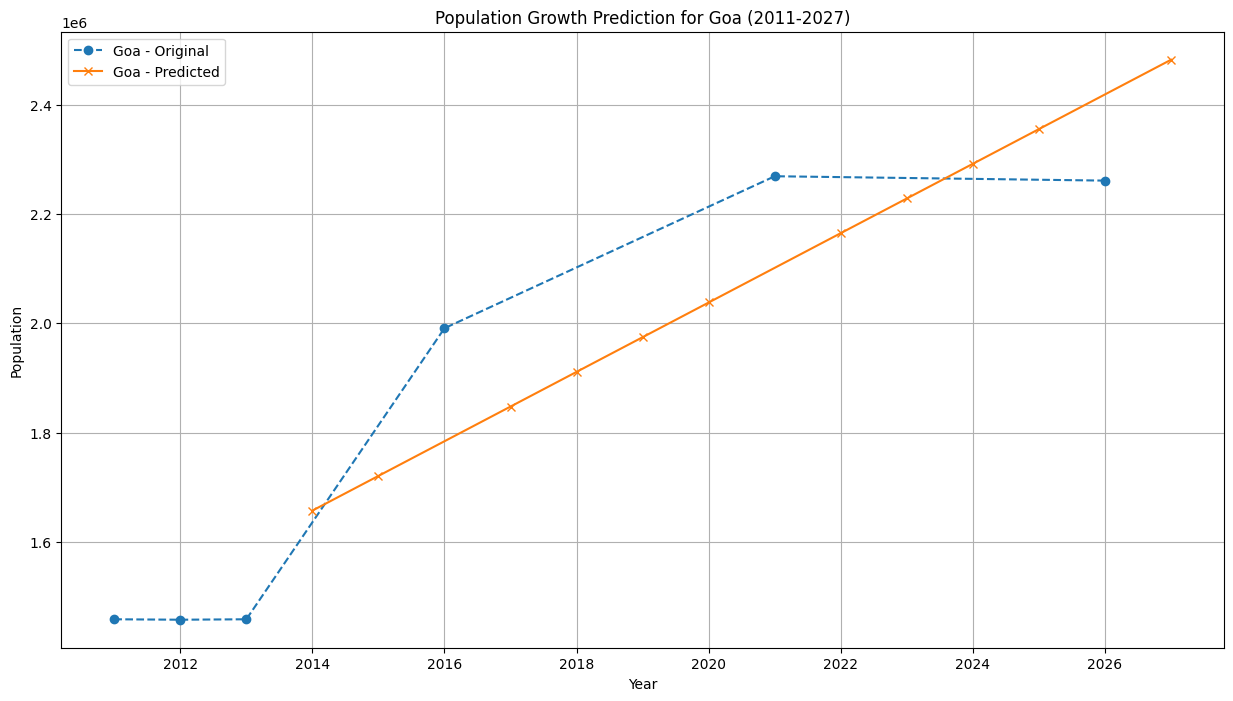

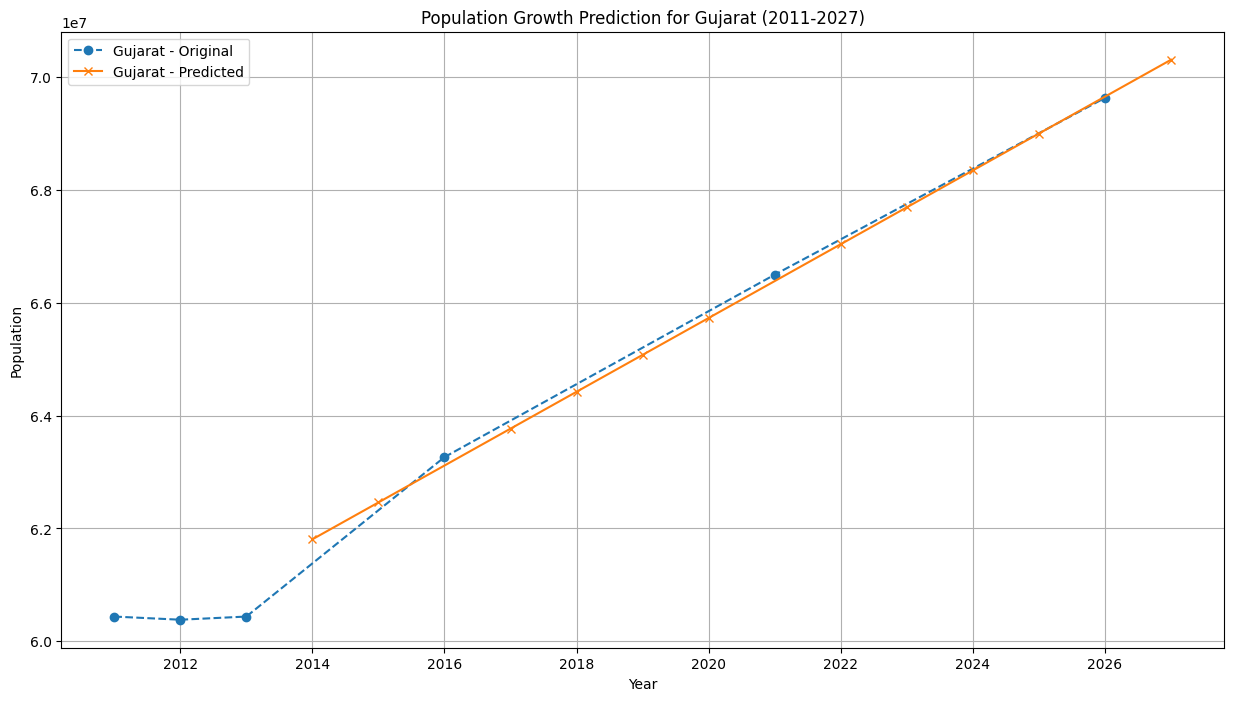

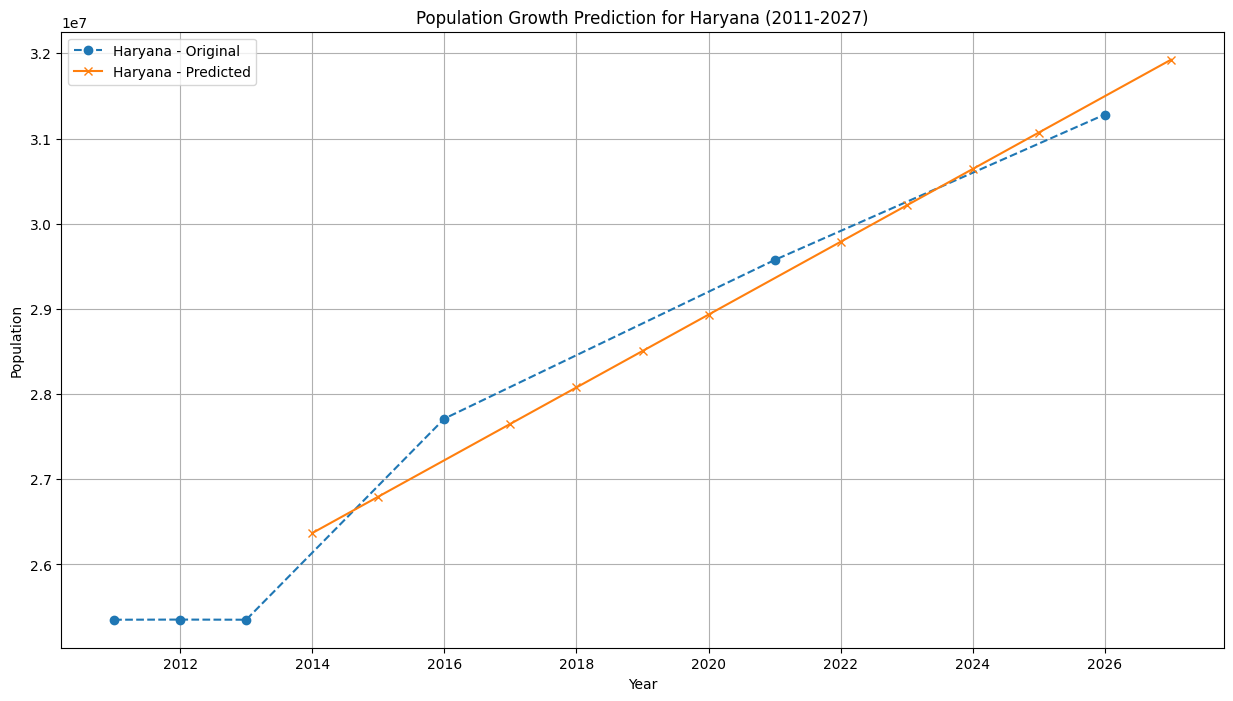

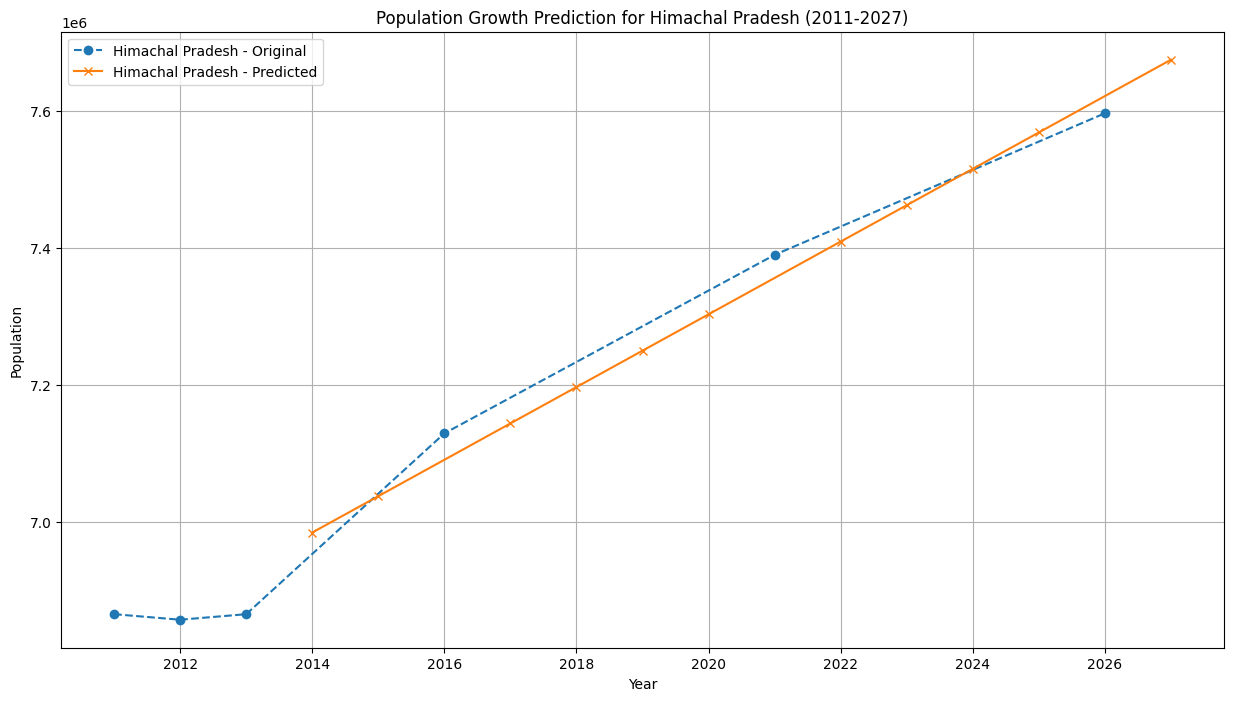

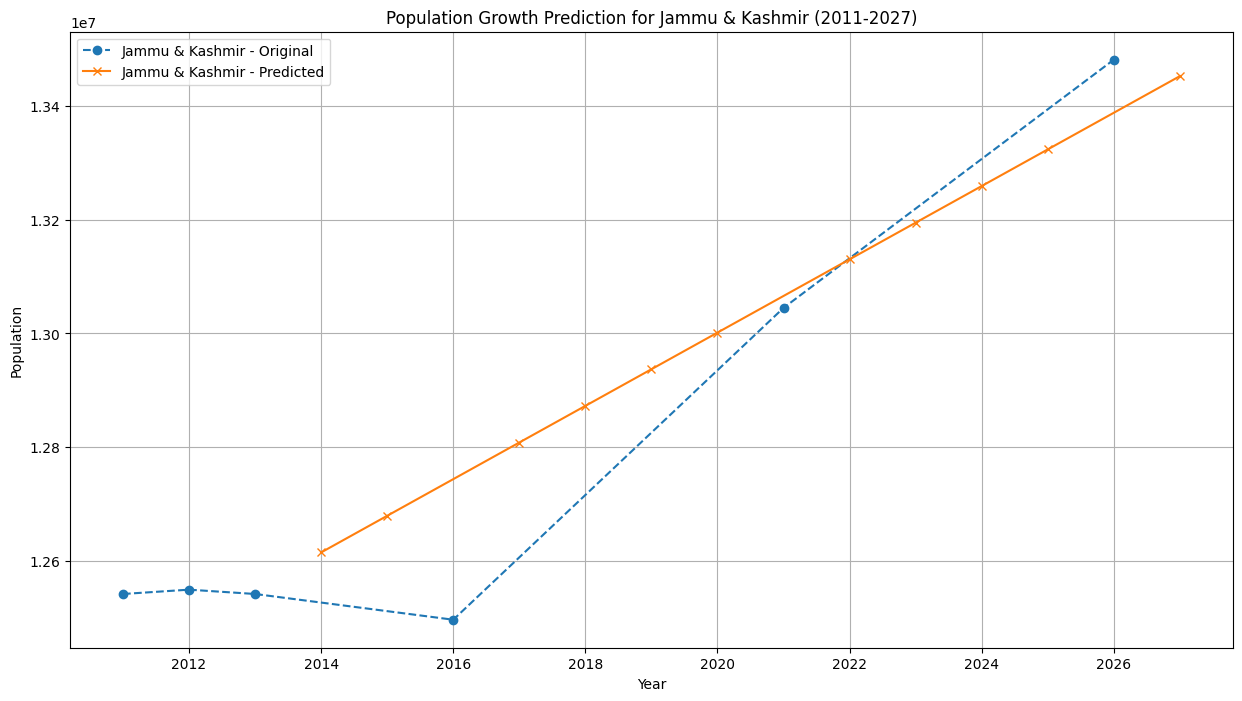

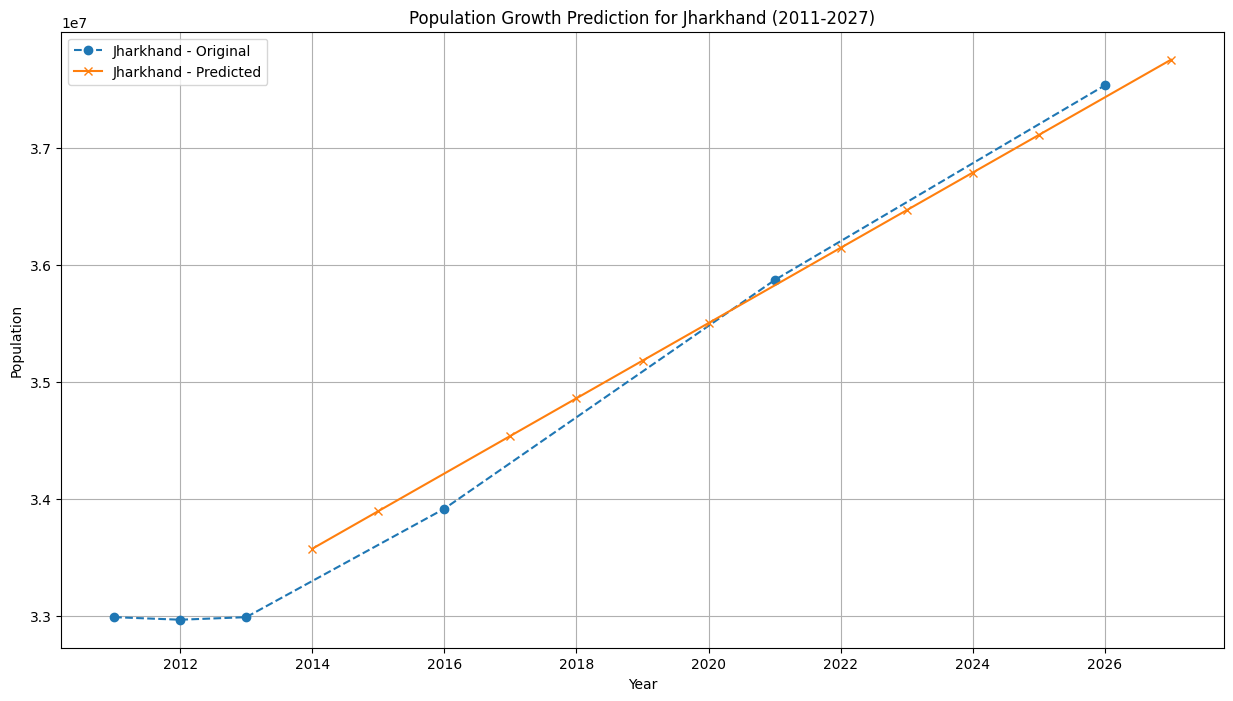

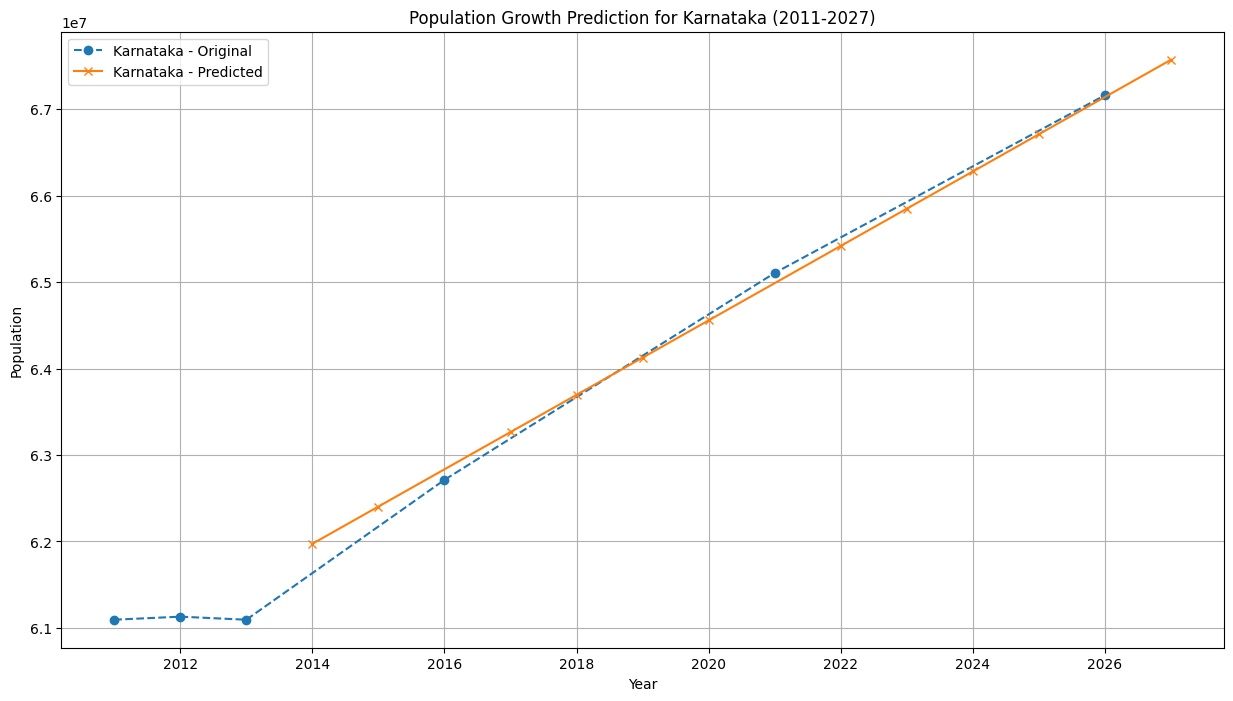

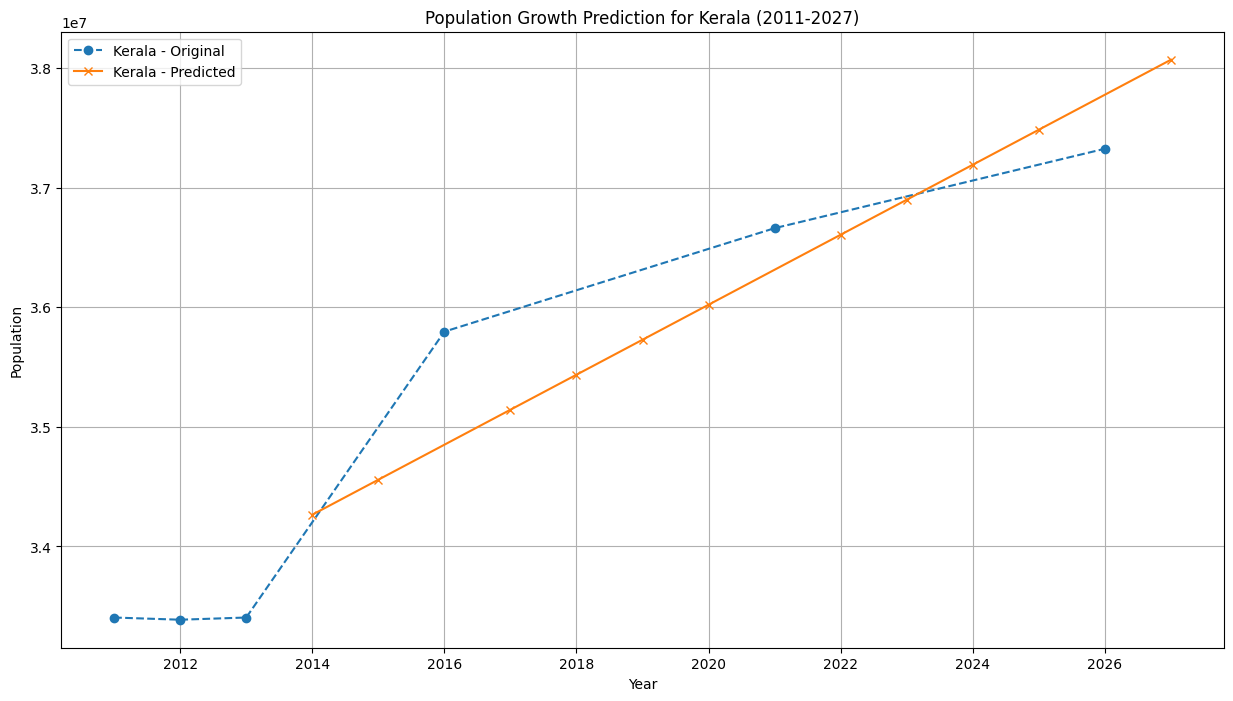

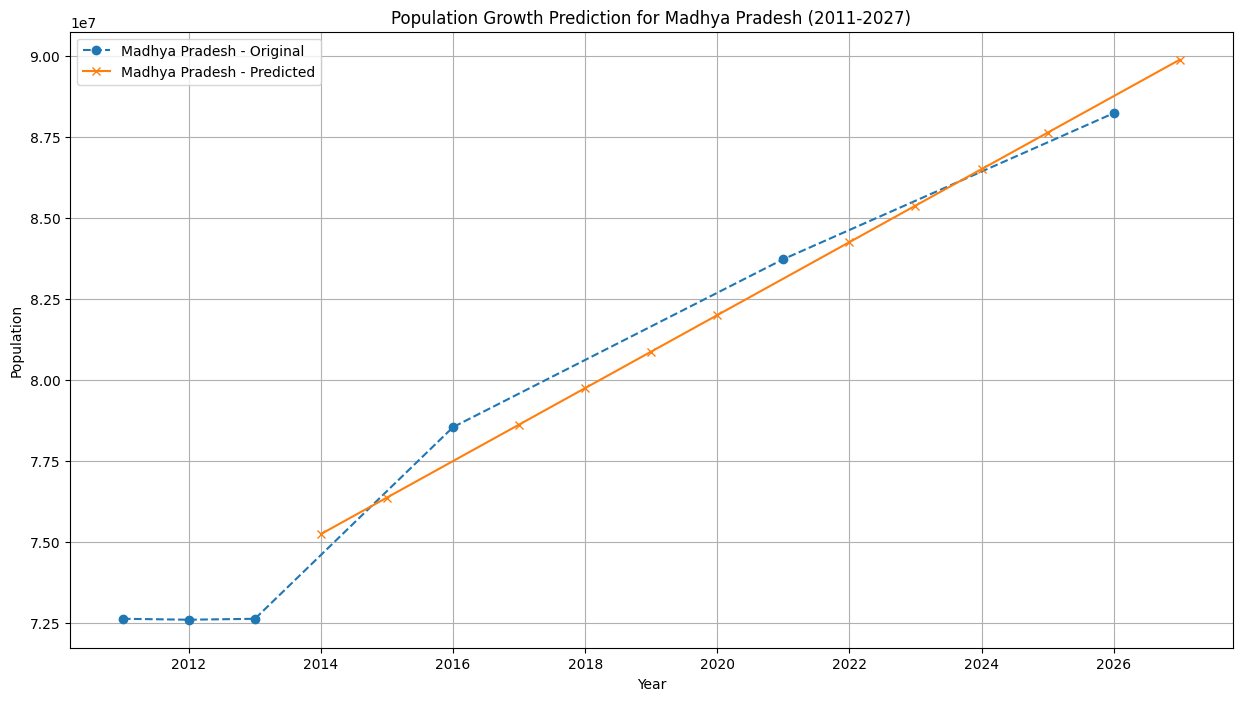

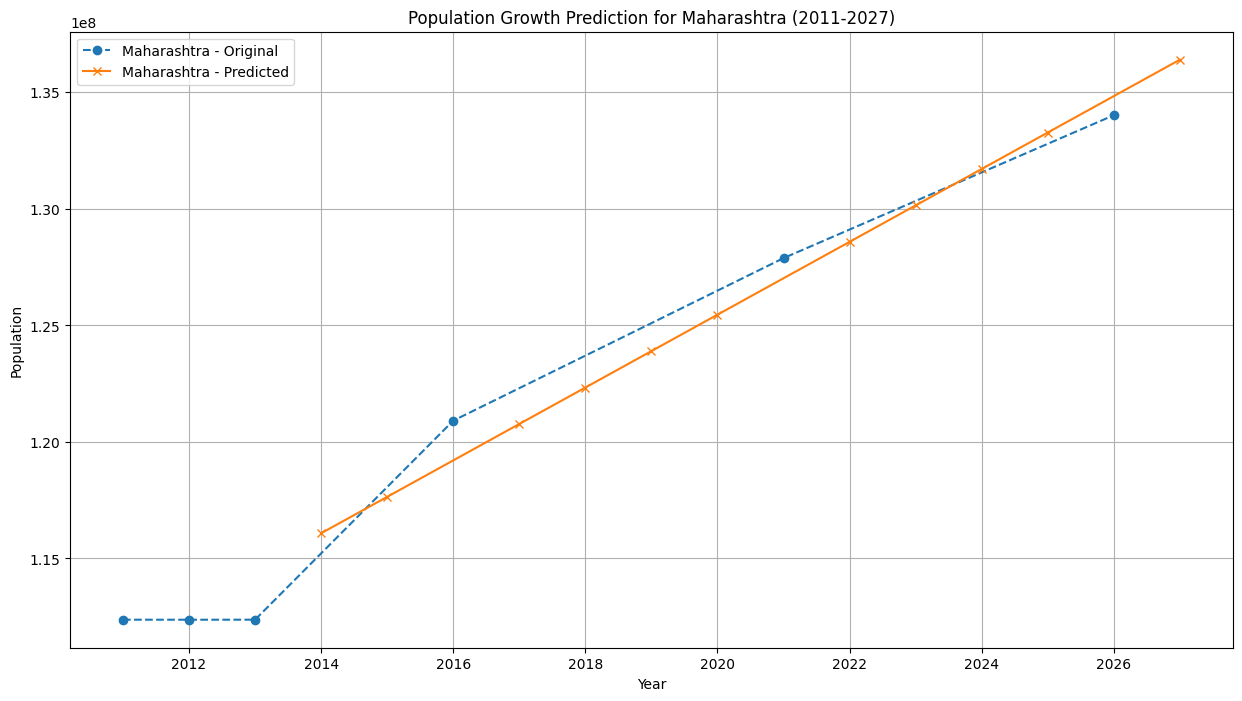

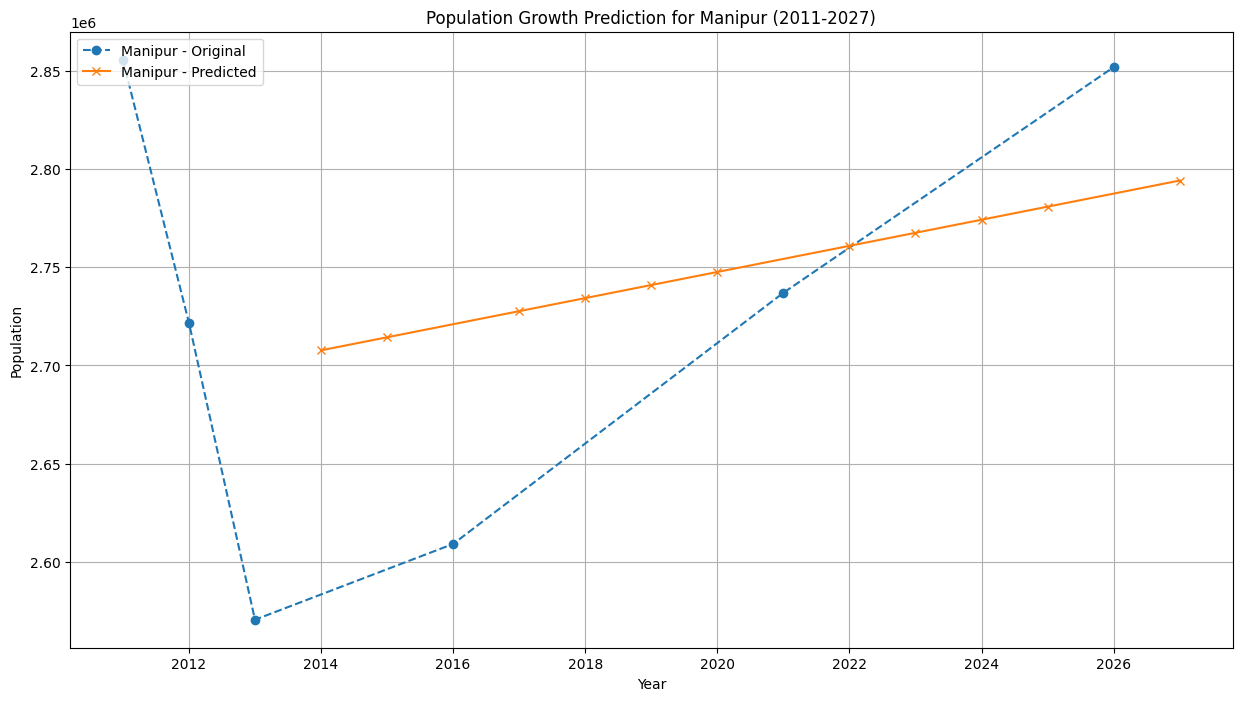

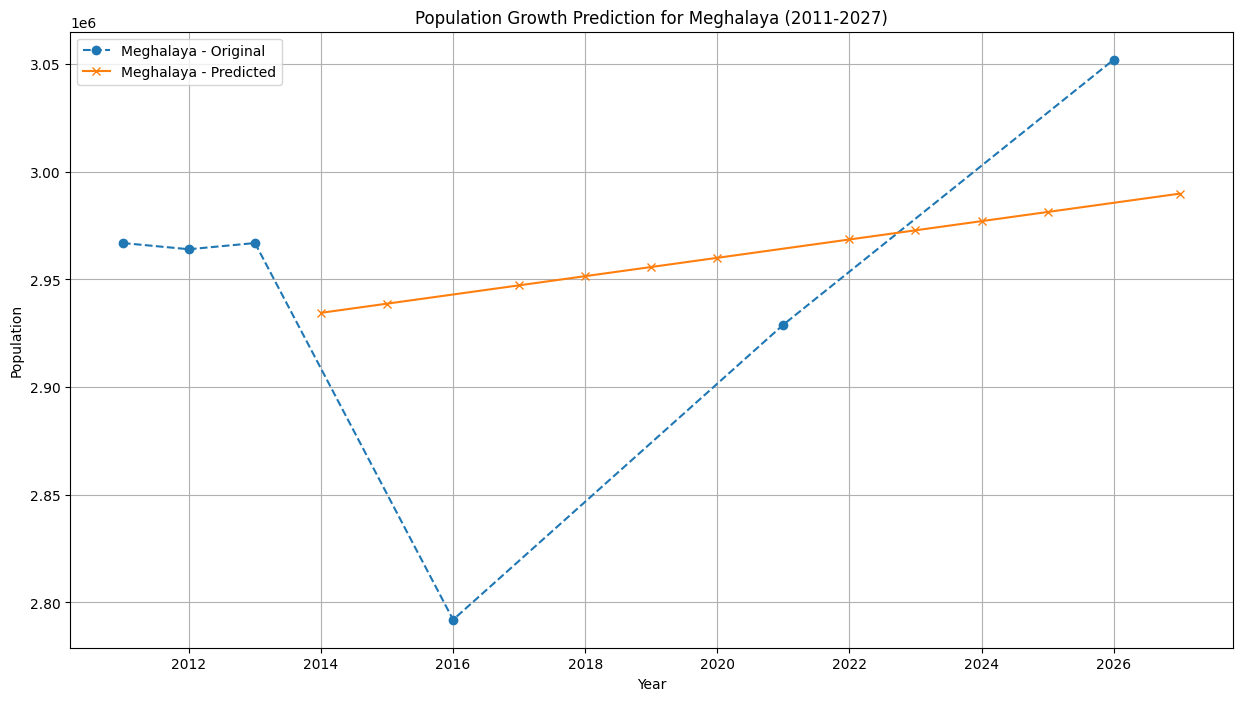

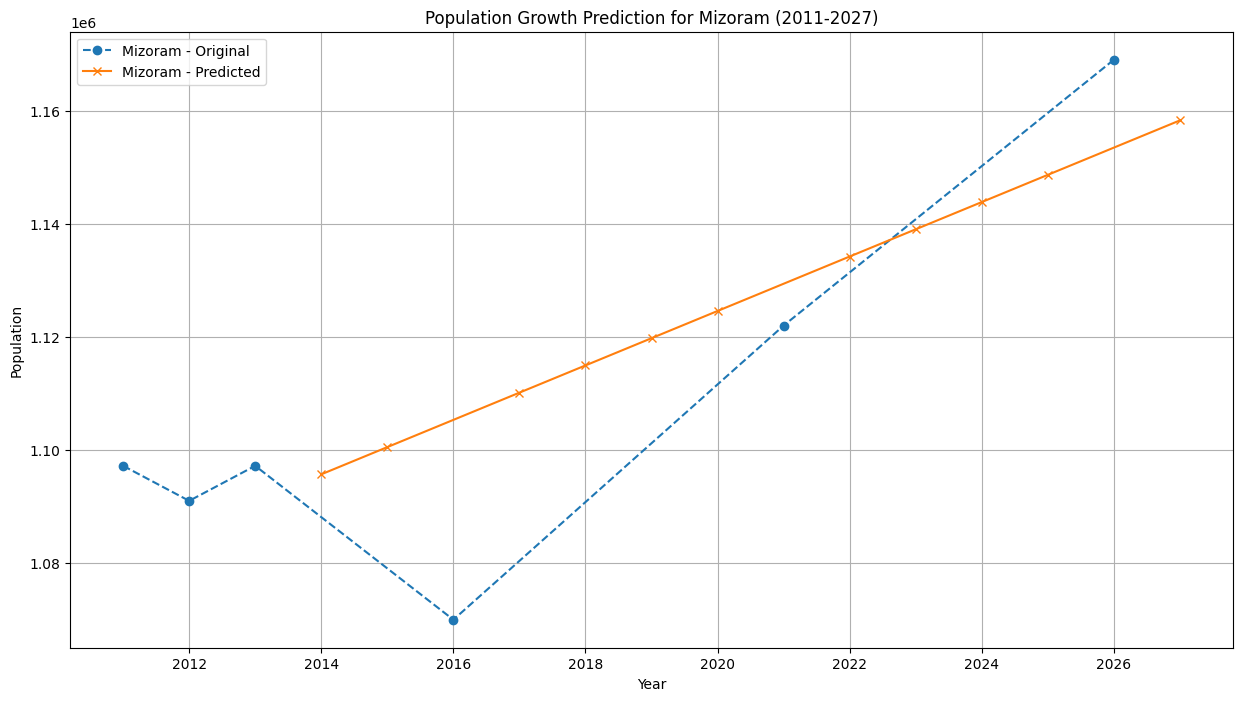

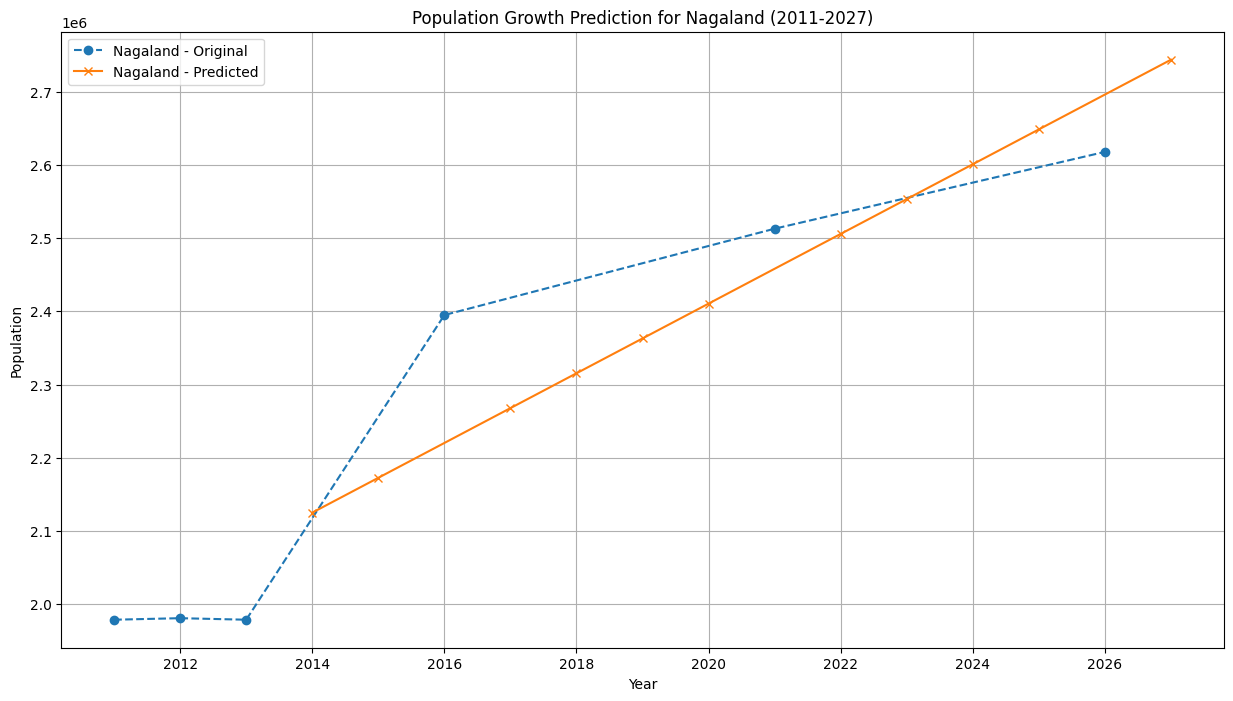

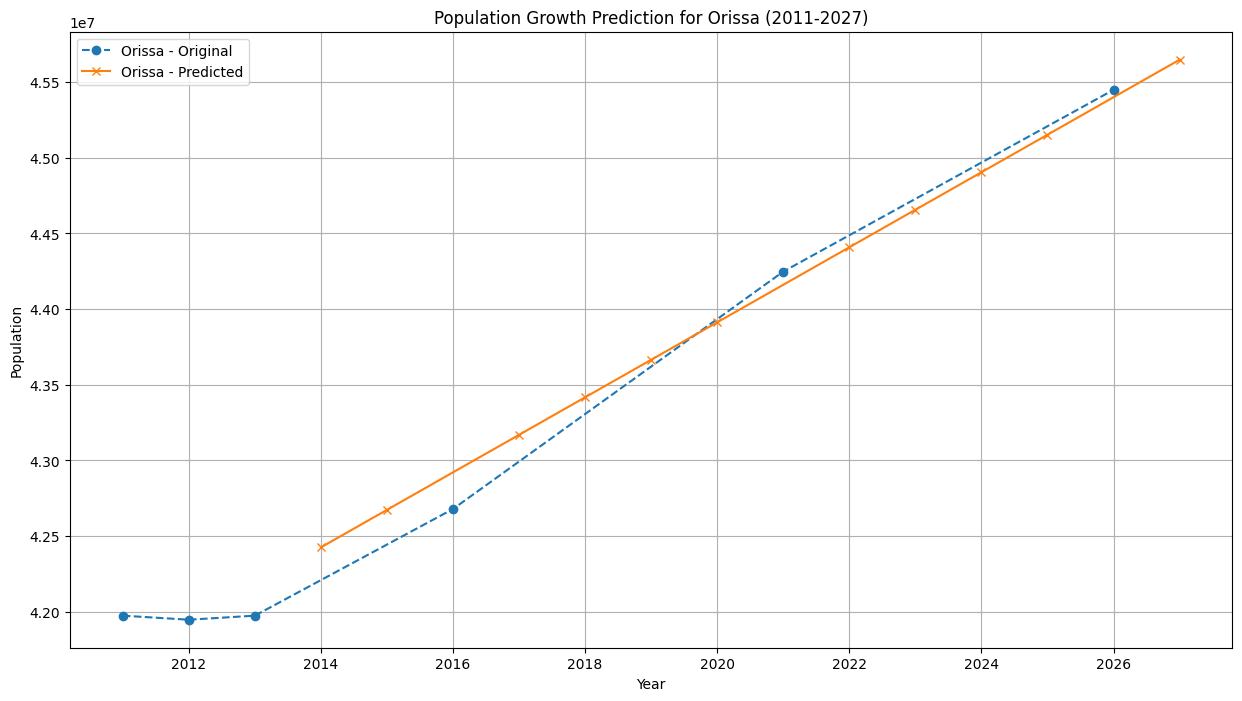

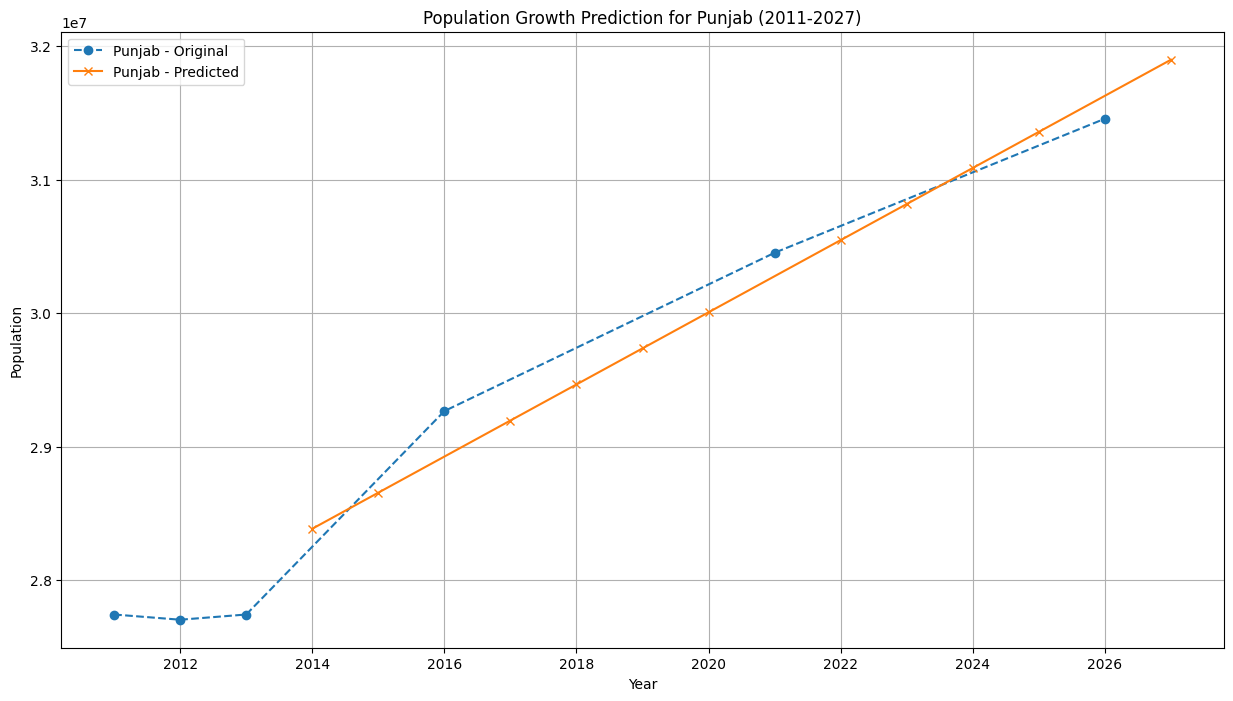

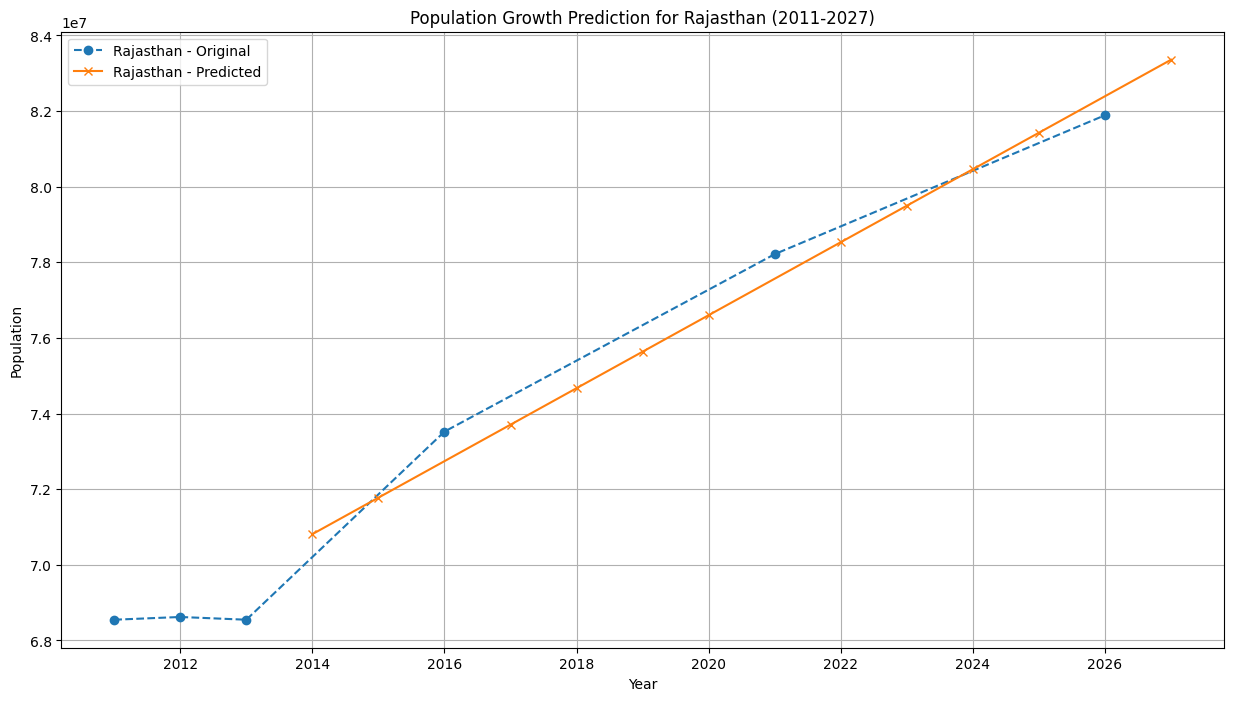

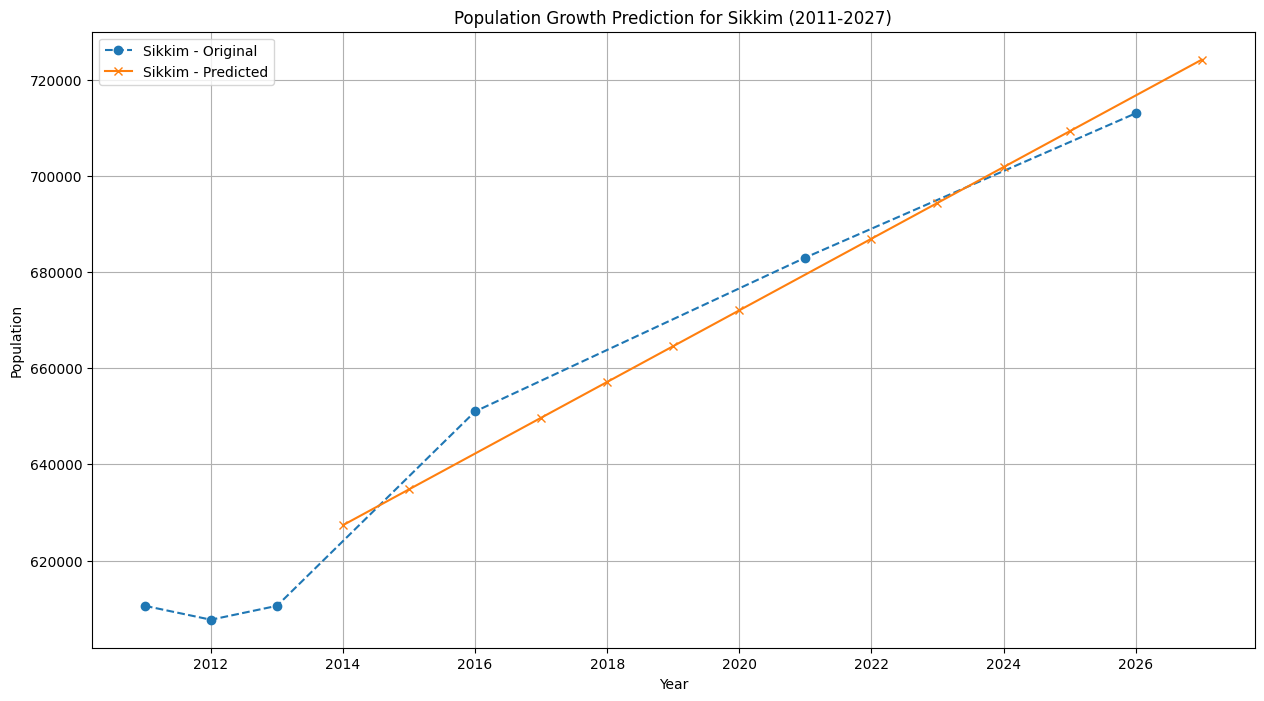

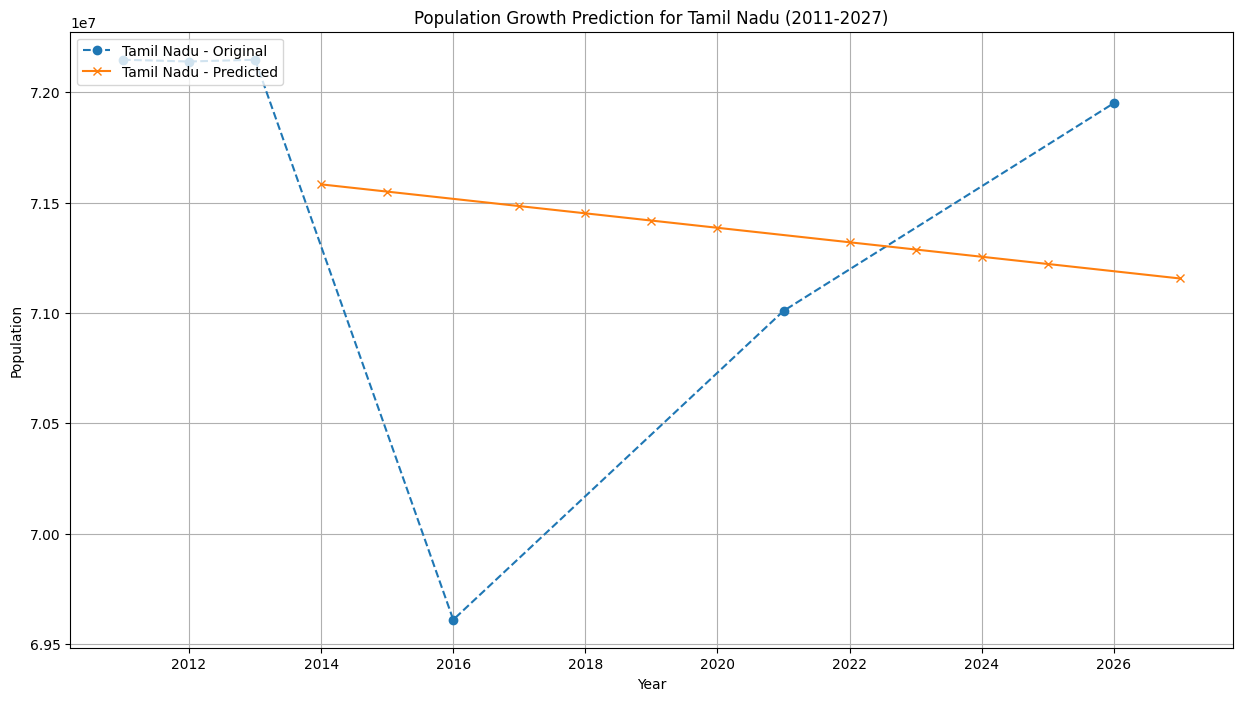

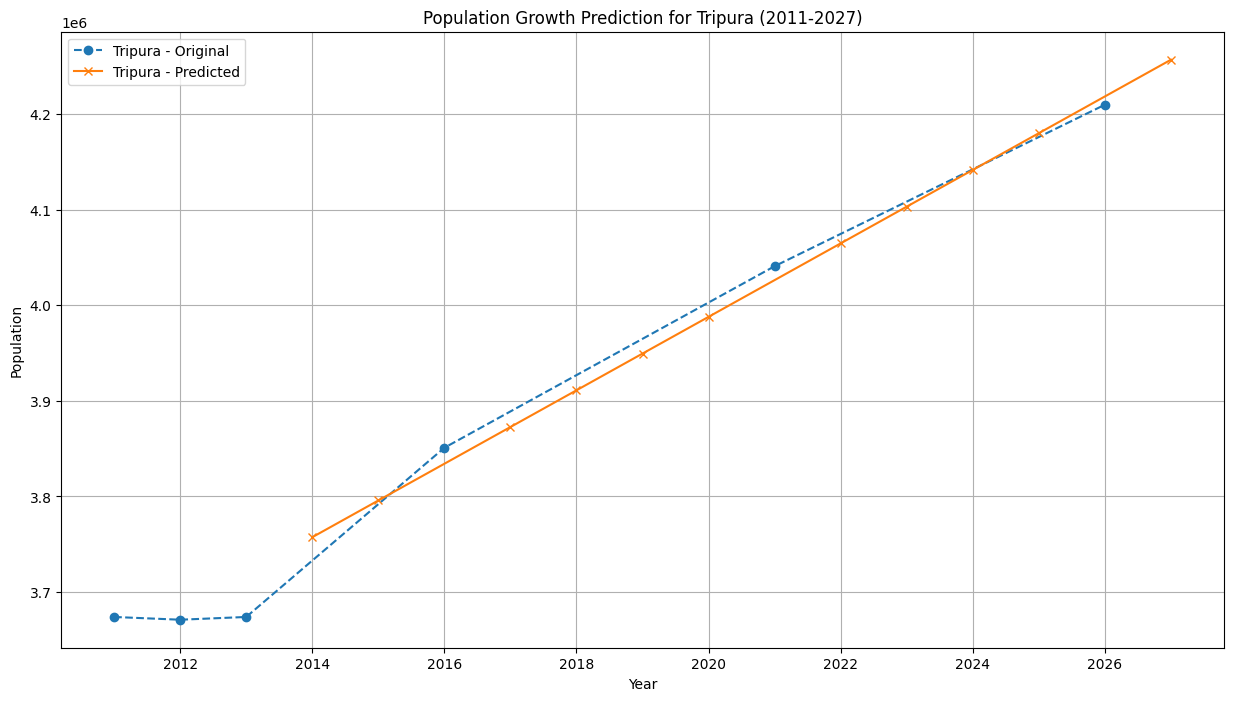

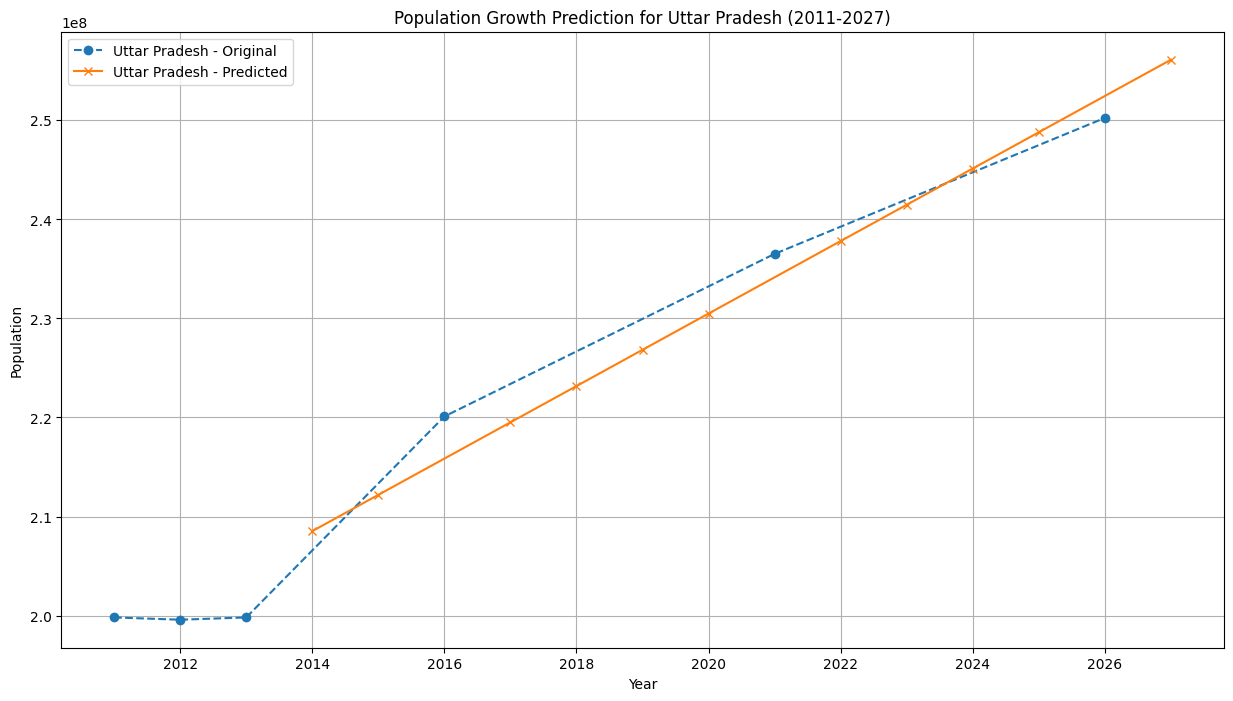

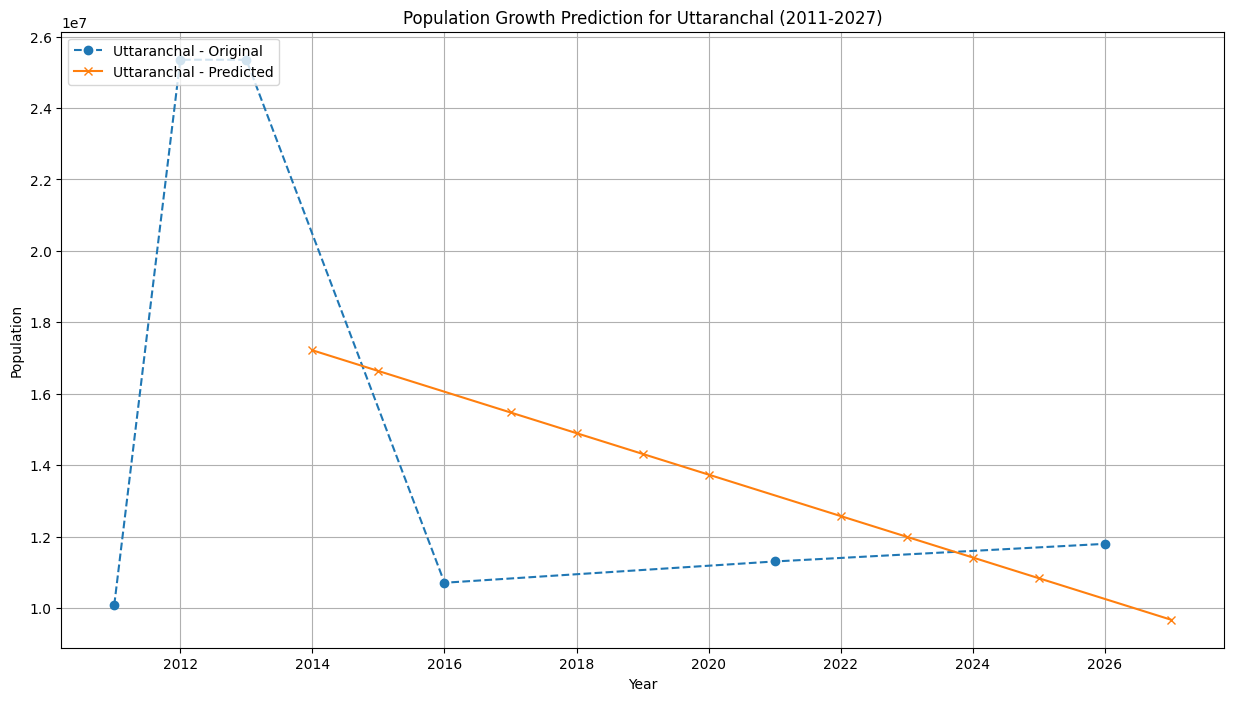

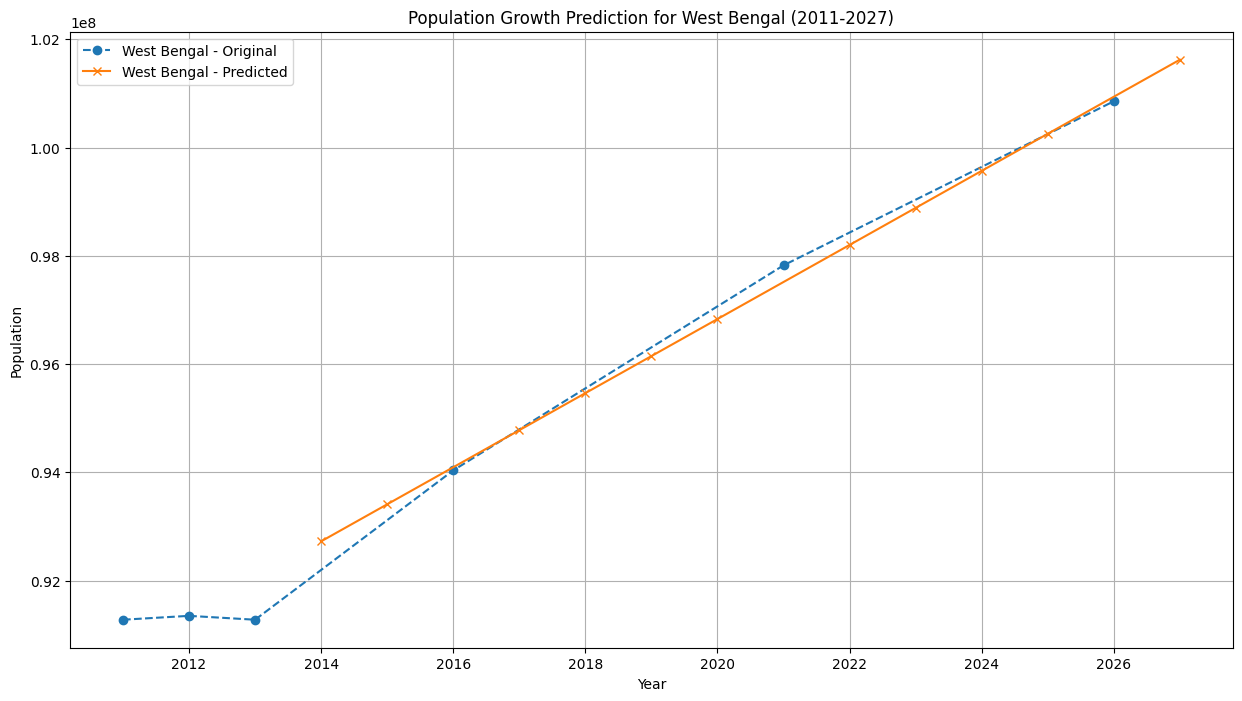

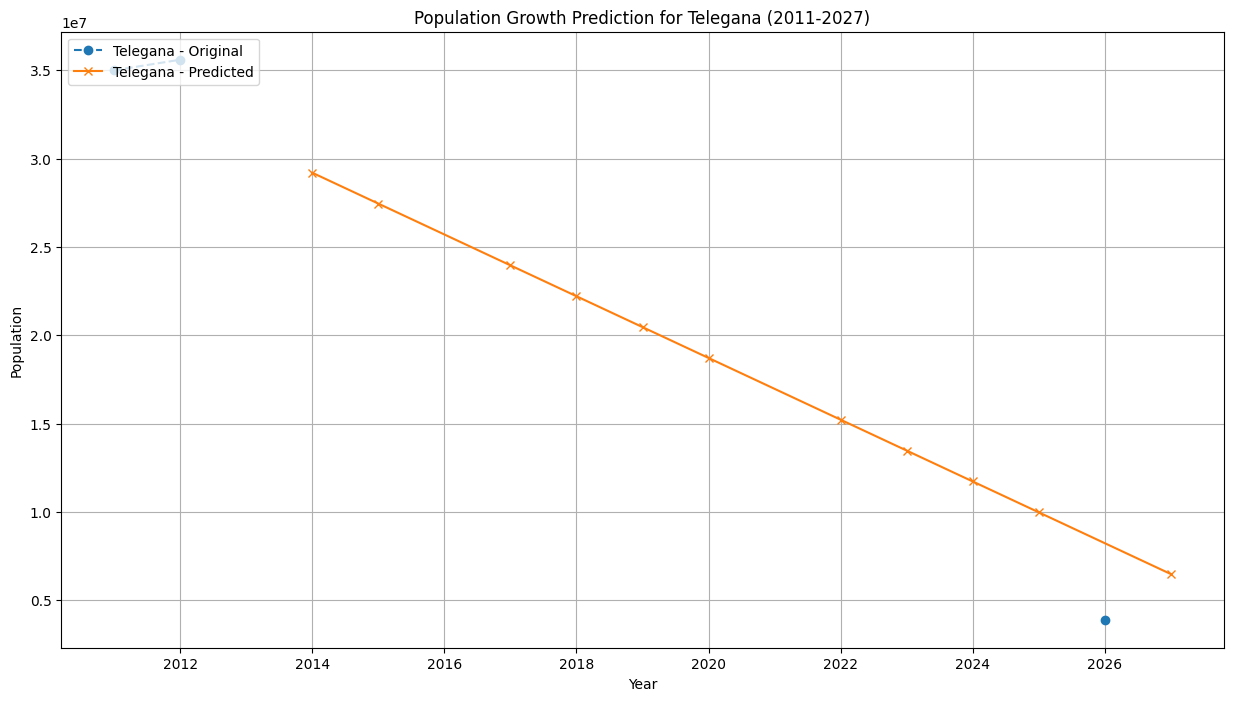

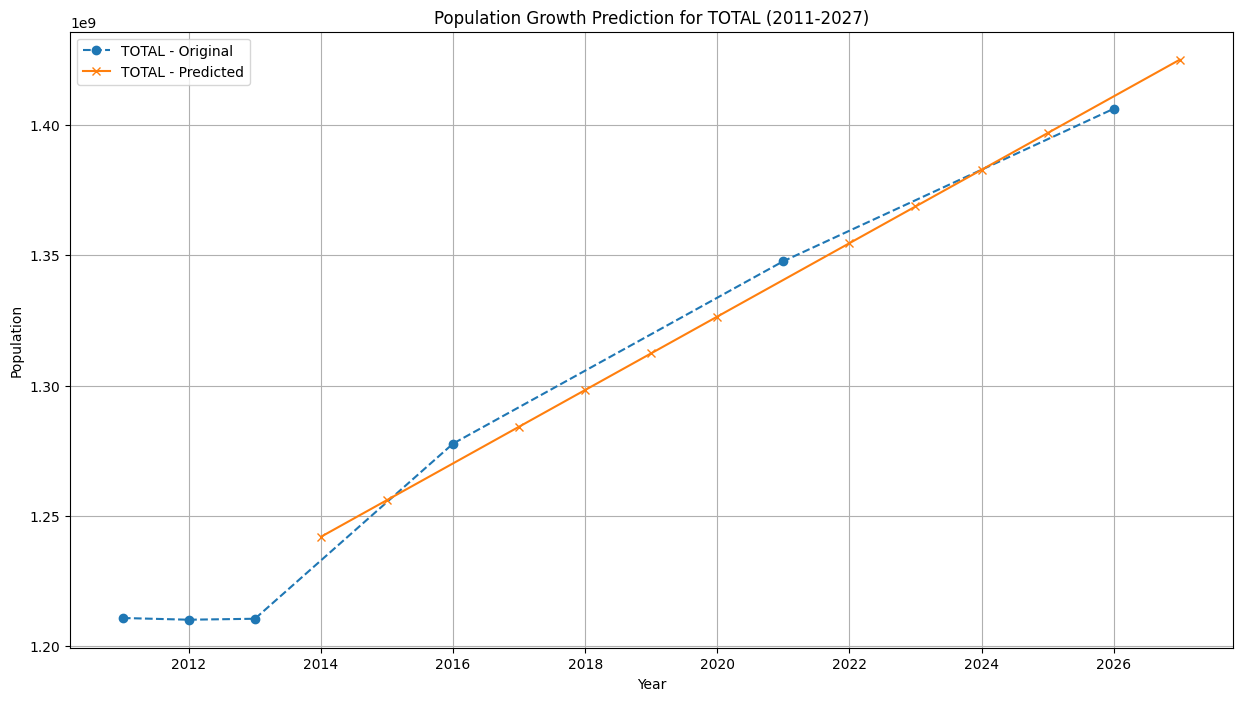

In [10]:
for index, row in df1.iterrows():
    state_name = row['State']

    # Prepare data for regression with the correct column names
    population_persons = np.array([
        row['2011_Persons'], row['2012_Persons'], row['2013_Persons'],
        row['2016_Persons'], row['2021_Persons'], row['2026_Persons']
    ]).reshape(-1, 1)

    population_males = np.array([
        row['2011_Male'], row['2012_Male'], row['2013_Male'],
        row['2016_Male'], row['2021_Male'], row['2026_Male']
    ]).reshape(-1, 1)

    population_females = np.array([
        row['2011_Female'], row['2012_Female'], row['2013_Female'],
        row['2016_Female'], row['2021_Female'], row['2026_ Female']
    ]).reshape(-1, 1)

    # Check for NaN values and fill them with the mean
    if np.any(np.isnan(population_persons)):
        avg_population_persons = np.nanmean(population_persons)  # Compute mean, ignoring NaN
        population_persons = np.where(np.isnan(population_persons), avg_population_persons, population_persons)

    if np.any(np.isnan(population_males)):
        avg_population_males = np.nanmean(population_males)
        population_males = np.where(np.isnan(population_males), avg_population_males, population_males)

    if np.any(np.isnan(population_females)):
        avg_population_females = np.nanmean(population_females)
        population_females = np.where(np.isnan(population_females), avg_population_females, population_females)

    # Linear Regression for Persons
    model_persons = LinearRegression().fit(historical_years, population_persons)
    persons_forecast = model_persons.predict(predicted_years)

    # Linear Regression for Males
    model_males = LinearRegression().fit(historical_years, population_males)
    males_forecast = model_males.predict(predicted_years)

    # Linear Regression for Females
    model_females = LinearRegression().fit(historical_years, population_females)
    females_forecast = model_females.predict(predicted_years)

    # Store the predictions
    for i, future_year in enumerate(predicted_years.flatten()):
        predicted_data['State'].append(state_name)
        predicted_data['Year'].append(future_year)
        predicted_data['Persons'].append(int(persons_forecast[i][0]))  # Convert to integer
        predicted_data['Males'].append(int(males_forecast[i][0]))      # Convert to integer
        predicted_data['Females'].append(int(females_forecast[i][0]))  # Convert to integer

# Convert the predictions to a DataFrame
predicted_df = pd.DataFrame(predicted_data)

# Save predicted data to Excel
predicted_df.to_excel('predicted_dataset.xlsx', index=False)

# Plotting
for state in df1['State'].unique():
    plt.figure(figsize=(15, 8))  # Create a new figure for each state

    # Filter data for the current state
    original_state_data = df1[df1['State'] == state]
    predicted_state_data = predicted_df[predicted_df['State'] == state]

    # Prepare data for plotting
    years_existing = np.array([2011, 2012, 2013, 2016, 2021, 2026])
    persons_existing = original_state_data[['2011_Persons', '2012_Persons', '2013_Persons', '2016_Persons', '2021_Persons', '2026_Persons']].values.flatten()
    forecasted_years = predicted_state_data['Year'].values
    persons_forecasted = predicted_state_data['Persons'].values

    # Plot the original data
    plt.plot(years_existing, persons_existing, marker='o', linestyle='--', label=f"{state} - Original")

    # Plot the predicted data
    plt.plot(forecasted_years, persons_forecasted, marker='x', linestyle='-', label=f"{state} - Predicted")

    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Population Growth Prediction for {state} (2011-2027)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()  # Show each graph separately for each state